# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import tensorflow as tf
import os
import cv2

import pandas as pd

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.plt.
%matplotlib inline

/home/rui/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rui/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rui/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rui/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# set up GPU
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11620404558544465228
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11274518528
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8935864381431245718
physical_device_desc: "device: 0, name: Tesla K40c, pci bus id: 0000:01:00.0, compute capability: 3.5"
]


---
## Step 0: Load The Data

In [4]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = os.path.join('traffic-signs-data','train.p')
validation_file = os.path.join('traffic-signs-data','valid.p')
testing_file = os.path.join('traffic-signs-data','test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
print(type(train))
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

<class 'dict'>


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
import numpy as np
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
path = os.getcwd()
path = os.path.join(path,'signnames.csv')
names = pd.read_csv(path)
names.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [7]:
names.set_index('ClassId', inplace=True)

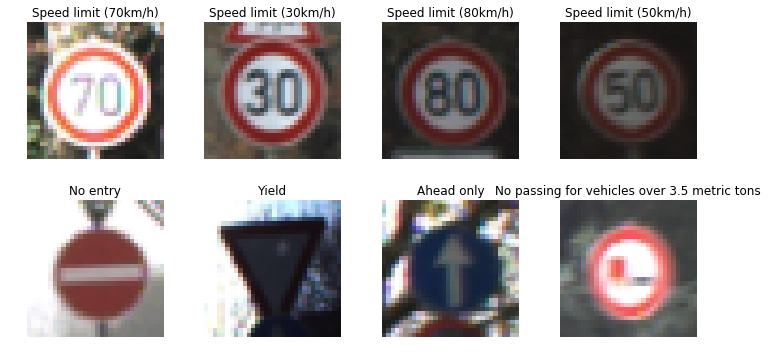

In [8]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.plt.
%matplotlib inline

import random
nrows, ncols = 2, 4
fig, axes = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(12,6))
for i in range(nrows):
    for j in range(ncols):
        idx = np.random.randint(n_train)
        img = X_train[idx]
        axes[i,j].imshow(img)
        axes[i,j].axis("off")
        axes[i,j].set_title(names.loc[y_train[idx],'SignName'])
plt.subplots_adjust(wspace=0.3,hspace=0.2)


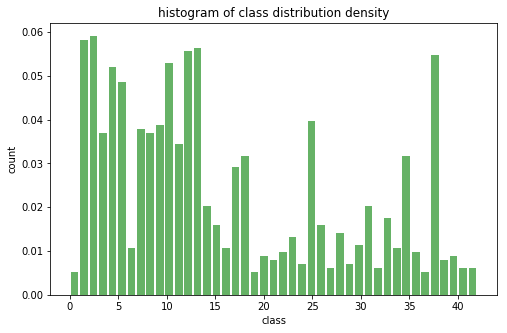

In [9]:
plt.figure(figsize=(8,5))
plt.hist(y_train,bins=n_classes, rwidth=0.8, align='mid', alpha=0.6, color='g', density=True)
plt.xlabel('class')
plt.ylabel('count')
plt.title('histogram of class distribution density')
plt.xticks(range(0,n_classes,5))
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

The preprocessing strategies I will try include:
- convert color images to grayscale since color does not play a important role in this task.
- [histogram equalization](https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html)
- normalization: i will normalize and shift the pixel values so that they lie in [0.1, 0.9].
- image augmentation including translation, rotation so that there are at least 1500 images for each class. It will increase the size of training set. Also, we get a more balanced dataset. 

check [here](https://medium.com/computer-car/intricacies-of-traffic-sign-classification-with-tensorflow-8f994b1c8ba) for typical image preprocessing approaches.

In [11]:
y_df = pd.Series(y_train)
count = y_df.value_counts().sort_values(ascending=False)
print(count.head(), count.tail())

2     2010
1     1980
13    1920
12    1890
38    1860
dtype: int64 41    210
27    210
37    180
19    180
0     180
dtype: int64


In [12]:
from scipy.ndimage.interpolation import shift, rotate

min_count = 1500
def deform(img_id):
    if count[y_train[img_id]] >= min_count:
        return False
    c = min_count // count[y_train[img_id]]
    X_aug = []
    y_aug = []
    while c >= 1:
        op = random.choice(["shift","rotate"])
        if op == "shift":
            # create a shifted image
            X_new = shift(X_train[img_id], [random.randrange(-2, 2), random.randrange(-2, 2), 0])
        else:
            # create a rotated image
            X_new = rotate(X_train[img_id], random.randrange(-10, 10), reshape=False)
            
        X_aug.append(X_new)
        y_aug.append(y_train[img_id])
        c -= 1
        # count[y_train[img_id]] += 1
    # return np.vstack((X_shift, X_rotate)), np.array([[y_train[img_id]],[y_train[img_id]]])
    return np.array(X_aug), np.array(y_aug)

# create more images, make sure there are at least 1500 images for each class
def augmentation():
    X_new = []
    y_new = []
    for img_id in range(n_train):
        aug = deform(img_id)
        if aug == False:
            continue       
        X_new.extend(aug[0])
        y_new.extend(aug[1])
    print(np.array(X_new).shape, np.array(y_new).shape)
    X_aug = np.append(X_train, np.array(X_new), axis=0)
    y_aug = np.append(y_train, np.array(y_new), axis=0)
    return X_aug, y_aug

X_aug, y_aug = augmentation()
print(X_train.shape, y_train.shape)
print(X_aug[0].shape, X_aug[1].shape)

(46618, 32, 32, 3) (46618,)
(34799, 32, 32, 3) (34799,)
(32, 32, 3) (32, 32, 3)


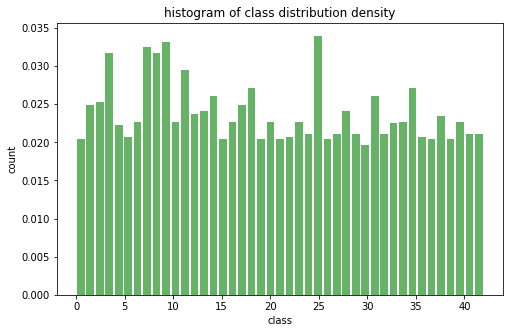

In [13]:
plt.figure(figsize=(8,5))
plt.hist(y_aug,bins=n_classes, rwidth=0.8, align='mid', alpha=0.6, color='g', density=True)
plt.xlabel('class')
plt.ylabel('count')
plt.title('histogram of class distribution density')
plt.xticks(range(0,n_classes,5))
plt.show()

In [14]:
from sklearn.utils import shuffle

def preprocess(X):  
    # convert to grayscale
    X = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X])
    # equalize Histogram
    X = np.array([cv2.equalizeHist(image) for image in X])
    # normalize
    # X = np.array([image/255 for image in X])
    X = np.array([image*0.8/255+0.1 for image in X])
    return X[:,:,:,np.newaxis]

X_train = preprocess(X_aug)
y_train = y_aug
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)



/home/rui/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Model Architecture

In [15]:
from tensorflow.contrib.layers import flatten

# this is modified LeNet architecture
def LeNet2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    keep_prob = 0.85
    
    nf1 = 128
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28 x nf1.
    W1 = tf.Variable(tf.truncated_normal(shape=[5,5,1,nf1], mean=mu, stddev=sigma, dtype=tf.float32, seed = 49), name="W1")
    b1 = tf.Variable(tf.zeros(nf1), name="b1")
    conv1 = tf.nn.conv2d(x, W1, strides=[1,1,1,1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, b1)
    conv1 = tf.nn.relu(conv1)
    # conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    nf2 = 64
    # Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=[5,5,nf1,nf2], mean=mu, stddev=sigma, dtype=tf.float32, seed = 49), name="W2")
    b2 = tf.Variable(tf.zeros(nf2), name="b2")
    conv2 = tf.nn.conv2d(conv1, W2, strides=[1,1,1,1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, b2)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    # Flatten. Input = 5x5x16. Output = 800, 
    fc = flatten(conv2)
    
    dim3_in = 5*5*nf2
    dim3_out = 512
    # Layer 3: Fully Connected. Input = 400. Output = 512.
    W3 = tf.Variable(tf.truncated_normal(shape=[dim3_in,dim3_out], mean=mu, stddev=sigma, dtype=tf.float32, seed = 49), name="W3")
    b3 = tf.Variable(tf.zeros(dim3_out), name="b3")
    fc3 = tf.add(tf.matmul(fc, W3), b3)
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, keep_prob)
    
    # Layer 4: Fully Connected. Input = 256. Output = 128.
    dim4_out = 256
    W4 = tf.Variable(tf.truncated_normal(shape=[dim3_out,dim4_out], mean=mu, stddev=sigma, dtype=tf.float32, seed = 49))
    b4 = tf.Variable(tf.zeros(dim4_out))
    fc4 = tf.add(tf.matmul(fc3, W4), b4)    
    fc4 = tf.nn.relu(fc4)
    fc4 = tf.nn.dropout(fc4,keep_prob)
    
    # Layer 5: Fully Connected. Input = 128. Output = n_classes.
    W5 = tf.Variable(tf.truncated_normal(shape=[dim4_out,n_classes], mean=mu, stddev=sigma, dtype=tf.float32, seed = 49))
    b5 = tf.Variable(tf.zeros(n_classes))
    logits = tf.add(tf.matmul(fc4, W5), b5)
    
    return logits

/home/rui/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [17]:
# Create a graph.

from datetime import datetime
now = datetime.now().strftime("%Y%m%d%H%M%S")
logdir = "tf_logs/run_{}".format(now)

graph = tf.Graph()

rate = 0.001
# Create model in the graph.
with graph.as_default():
    x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, n_classes)
    
    logits = LeNet2(x)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)
    
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32),name="acc_op")
    
    with tf.name_scope('performance'):
        acc = tf.placeholder(tf.float32,shape=None, name='accuracy_train')
        # train accuracy
        accuracy_train_scalar = tf.summary.scalar("train_acc", acc)
        # validation accuracy
        accuracy_valid_scalar = tf.summary.scalar("valid_acc", acc)
     
    file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
    
    saver = tf.train.Saver()

In [18]:
print(accuracy_op.graph is graph, accuracy_train_scalar.graph is graph)

True True


In [19]:
BATCH_SIZE = 128
def evaluate(dataX, dataY):
    num_examples = len(dataX)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = dataX[offset:offset+BATCH_SIZE], dataY[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_op, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
EPOCHS = 20
BATCH_SIZE = 128

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...") 
    print()
    for i in range(EPOCHS):
        print("EPOCH {} ...".format(i+1))
        
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
         
        #print("train_accuracy:", sess.run(accuracy_op, feed_dict={x:X_train, y:y_train}))
        #The above doesn't work, probably because memory size limit
        train_acc = evaluate(X_train, y_train)
        valid_acc = evaluate(X_valid, y_valid)
        print("train_accuracy:", train_acc)
        print("valid_accuracy:", valid_acc)
        
        accuracy_train = accuracy_train_scalar.eval(feed_dict={acc:train_acc})
        accuracy_valid = accuracy_valid_scalar.eval(feed_dict={acc:valid_acc})
        file_writer.add_summary(accuracy_train, i)
        file_writer.add_summary(accuracy_valid, i)
        print()
    saver.save(sess, './save_model/lenet')
    file_writer.close()
    print("Model saved")

Training...

EPOCH 1 ...
train_accuracy: 0.9124138693393272
valid_accuracy: 0.8757369615053103

EPOCH 2 ...
train_accuracy: 0.9705344092757041
valid_accuracy: 0.9272108846240573

EPOCH 3 ...
train_accuracy: 0.9827063144060822
valid_accuracy: 0.9378684804823393

EPOCH 4 ...
train_accuracy: 0.9854207352272867
valid_accuracy: 0.9392290247270579

EPOCH 5 ...
train_accuracy: 0.986477025682597
valid_accuracy: 0.9476190474027949

EPOCH 6 ...
train_accuracy: 0.991254897625803
valid_accuracy: 0.9473922902494331

EPOCH 7 ...
train_accuracy: 0.975901838682339
valid_accuracy: 0.9158730158730158

EPOCH 8 ...
train_accuracy: 0.9936254099266738
valid_accuracy: 0.9544217689777988

EPOCH 9 ...
train_accuracy: 0.995172998268175
valid_accuracy: 0.9619047619317935

EPOCH 10 ...
train_accuracy: 0.9936622572681381
valid_accuracy: 0.9598639458485472

EPOCH 11 ...
train_accuracy: 0.9959467924389255
valid_accuracy: 0.9664399090537679

EPOCH 12 ...
train_accuracy: 0.9933060663006498
valid_accuracy: 0.9594104308

about save and restore model, see [here](http://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/).

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

Go to [google Germany](https://www.google.de/) and use [google translate](https://translate.google.com/) to search for German traffic signs more efficiently.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

```
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph("./save_model/lenet.meta")
    saver.restore(sess, tf.train.latest_checkpoint('./save_model/'))

    ops = tf.get_default_graph().get_operations()
    for op in ops:
        print(op.name)
```

I will first try on the test set below.

In [22]:
with tf.Session(graph=graph) as sess:
    # saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, tf.train.latest_checkpoint('./save_model/'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./save_model/lenet
Test Accuracy = 0.937


The test accuracy on the test dataset is **93.5%** after training for 20 epochs on augmented and preprocessed images, which is not bad. 

### Load and Predict the Images

In [23]:
def process(image):  
    # print(image.shape)
    X = cv2.resize(image, (32, 32))
    # print(X.shape)
    # convert to grayscale
    X = cv2.cvtColor(X, cv2.COLOR_RGB2GRAY)
    # print(X.shape)
    # equalize Histogram
    X = cv2.equalizeHist(X)
    # normalize
    X = X*0.8/255+0.1
    
    # return an image of shape (1,32,32,1)
    return X.reshape((1,32,32,1))
    #return X[np.newaxis,:,:,np.newaxis]

def predict_image(image):
    image = process(image)
    pred = logits.eval(feed_dict={x:image})
    return np.argmax(pred[0])


INFO:tensorflow:Restoring parameters from ./save_model/lenet


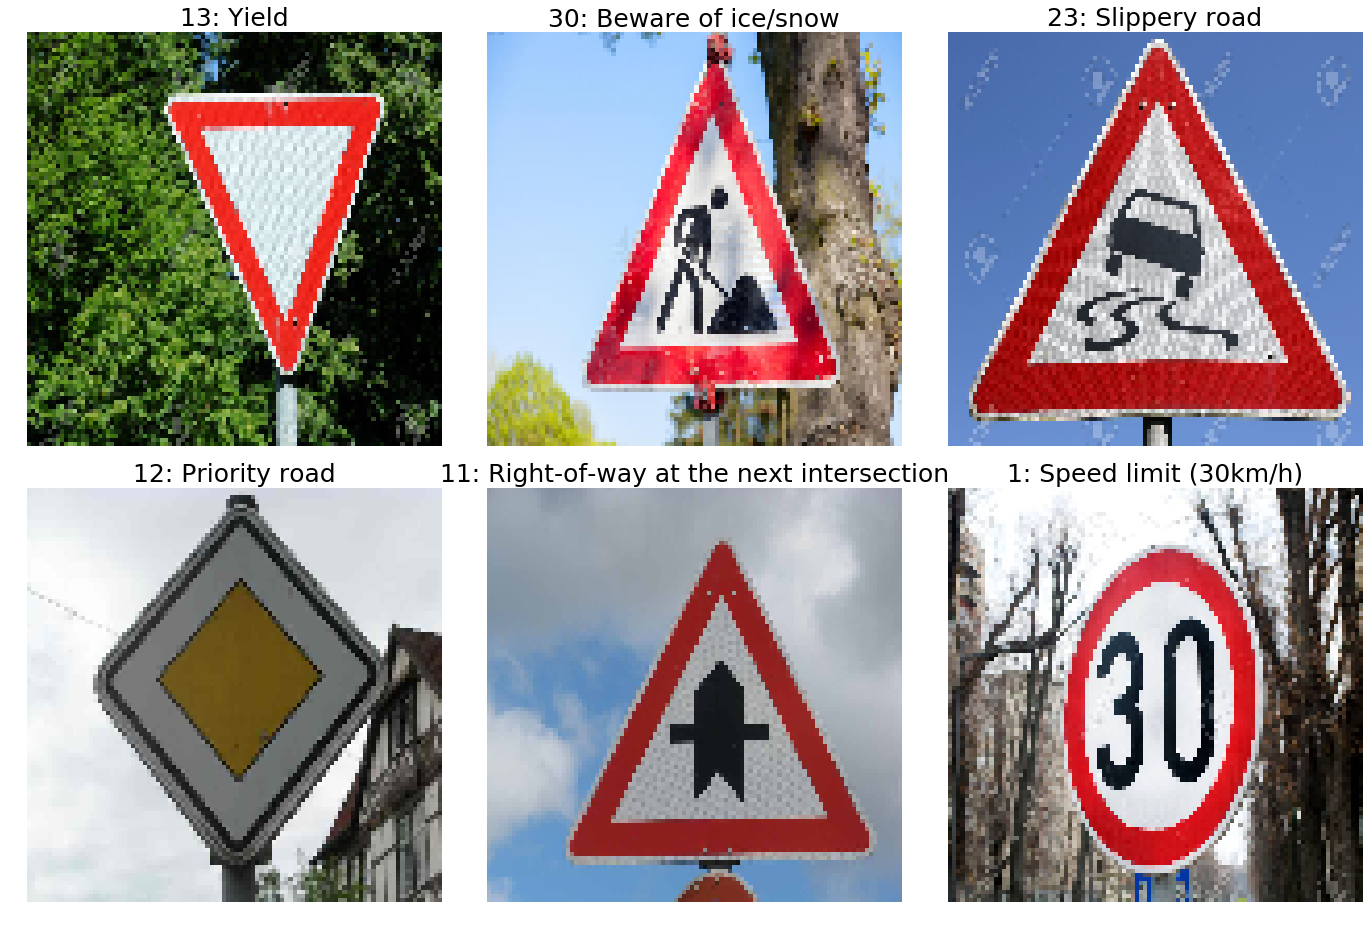

In [24]:
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(24,16))
path = os.path.join('./', 'GermanTrafficSigns')
with tf.Session(graph=graph) as sess:
    saver = tf.train.import_meta_graph("./save_model/lenet.meta")
    saver.restore(sess, tf.train.latest_checkpoint('./save_model/'))
    for i in range(nrows):
        for j in range(ncols):
            idx = ncols*i + j 
            img = cv2.imread(os.path.join(path, str(idx)+".jpg"))
            # cv2 reads images as BRG, now convert them into RGB in order to display with pyplot
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img100 = cv2.resize(img, (100,100))
            axes[i,j].imshow(img100)
            axes[i,j].axis("off")

            # predict the category of the image
            img_cat = predict_image(img)
            axes[i,j].set_title(label=str(img_cat)+": " + names.loc[img_cat,'SignName'], fontdict={'fontsize':25})
    plt.subplots_adjust(wspace=0.1, hspace=.1)

I tested the image classifier on 6 images. The overall accuracy is **100%**.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session(graph=graph) as sess:
    saver = tf.train.import_meta_graph("./save_model/lenet.meta")
    saver.restore(sess, tf.train.latest_checkpoint('./save_model/'))
    
    proba_array = np.empty((6,n_classes))
    path = os.path.join('./', 'GermanTrafficSigns')
    for i in range(6):
        img = cv2.imread(os.path.join(path, str(i)+".jpg"))
        
        # img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        # it is not necessary to convert from BRG to RGB
        image = process(img)
        
        # evalute the softmax of the logits for probability
        proba = tf.nn.softmax(logits).eval(feed_dict={x:image}) 
        proba_array[i,:] = proba[0,:]
    top5 = sess.run(tf.nn.top_k(tf.constant(proba_array), k=5))
    print(top5)

INFO:tensorflow:Restoring parameters from ./save_model/lenet
TopKV2(values=array([[3.51068407e-01, 3.03769529e-01, 1.76710874e-01, 5.10783978e-02,
        3.76269259e-02],
       [9.92814660e-01, 5.02333045e-03, 2.13201274e-03, 1.32892610e-05,
        6.73163868e-06],
       [1.00000000e+00, 1.50700442e-11, 6.76209436e-12, 3.05904905e-13,
        2.22372000e-14],
       [1.00000000e+00, 1.01906858e-10, 3.86052613e-11, 3.21085242e-11,
        1.74958693e-11],
       [9.99994755e-01, 5.26212580e-06, 5.28966275e-08, 7.42316690e-13,
        4.34820989e-13],
       [8.29243183e-01, 1.05407178e-01, 2.48716343e-02, 2.20480468e-02,
        7.95195065e-03]]), indices=array([[ 2,  3, 21, 12,  5],
       [24, 26, 30, 18, 29],
       [23, 19, 28, 30, 20],
       [12, 40, 17,  2, 15],
       [11, 40, 30,  5, 34],
       [ 1, 18, 30, 40,  6]], dtype=int32))


The image classifier is very confident of its results on the six downloaded images. 